In [1]:
# Importing Libs
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\Yasser Arafat\\Desktop\\FuelConsumptionCo2.csv") # Importing Data
# df.head() # Taking a look at the data!

In [3]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [4]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])
test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

poly = PolynomialFeatures(degree = 3)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.   ,  2.   ,  4.   ,  8.   ],
       [ 1.   ,  2.4  ,  5.76 , 13.824],
       [ 1.   ,  1.5  ,  2.25 ,  3.375],
       ...,
       [ 1.   ,  3.   ,  9.   , 27.   ],
       [ 1.   ,  3.2  , 10.24 , 32.768],
       [ 1.   ,  3.2  , 10.24 , 32.768]])

In [6]:
train_results = regr.fit(train_x_poly,train_y)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[ 0.         36.31835637  2.72925023 -0.38202476]]
Intercept:  [120.50024931]


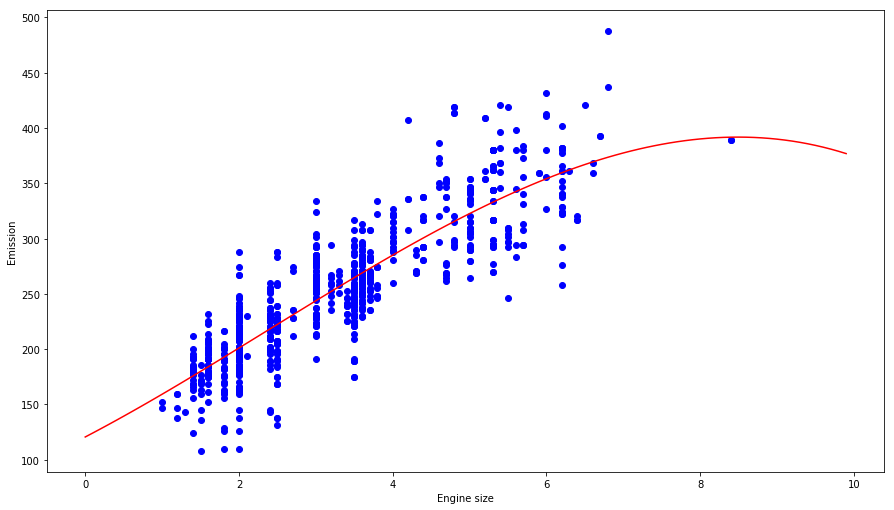

In [7]:
plt.figure(figsize = (15,8.5))
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color="blue")
XX = np.arange(0.0, 10.0, 0.1)
yy = regr.intercept_[0]+ regr.coef_[0][1]*XX+ regr.coef_[0][2]*np.power(XX, 2) + regr.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [8]:
from sklearn.metrics import r2_score
test_x_poly = poly.fit_transform(test_x)
test_y_results= regr.predict(test_x_poly)
test_y_results

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_results - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_results - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_results , test_y) )

Mean absolute error: 22.80
Residual sum of squares (MSE): 920.76
R2-score: 0.73


# Therefore the Accuracy of our Trained Model for unknown data is 73%